# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [46]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [34]:
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`

In [35]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [36]:
# We have two 'object' types, and one 'float64' -integer- type.
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


#### Select the rows where state is New York

In [37]:
ny = temp[temp['State'] == 'New York']

#### What is the average of the temperature of cities in New York?

In [38]:
ny['Temperature'].mean()

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [39]:
ab_15 = temp[temp['Temperature']>15]

#### Now, return only the cities that have a temperature above 15 degress Celcius

In [40]:
ab_15['City']

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [140]:
t_20 = temp[(temp['Temperature'] > 15) & (temp['Temperature'] < 20)]
t_20['City']

0         NYC
3    Hartford
Name: City, dtype: object

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [42]:
temp.groupby(['State']).mean()

,Temperature
State,
Connecticut,15.833333
New Jersey,21.111111
New York,10.740741


In [43]:
temp.groupby(['State']).std()

,Temperature
State,
Connecticut,1.964186
New Jersey,1.571348
New York,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [44]:
employee = pd.read_csv('Employee.csv')

#### Explore the data types of the Temp dataframe. Comment your results

In [45]:
# There are two integer types and the others are objects.
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

In [55]:
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

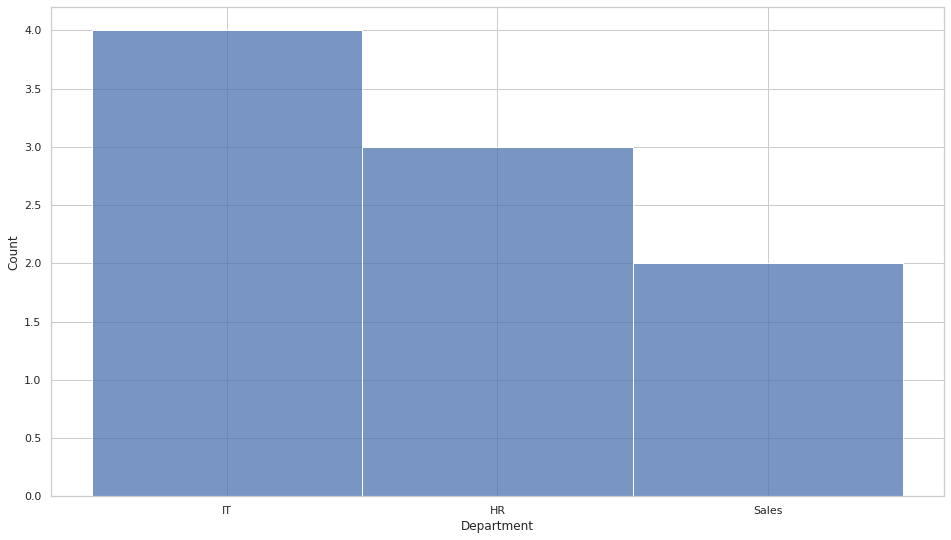

In [60]:
sns.histplot(x=employee['Department'], color='b');

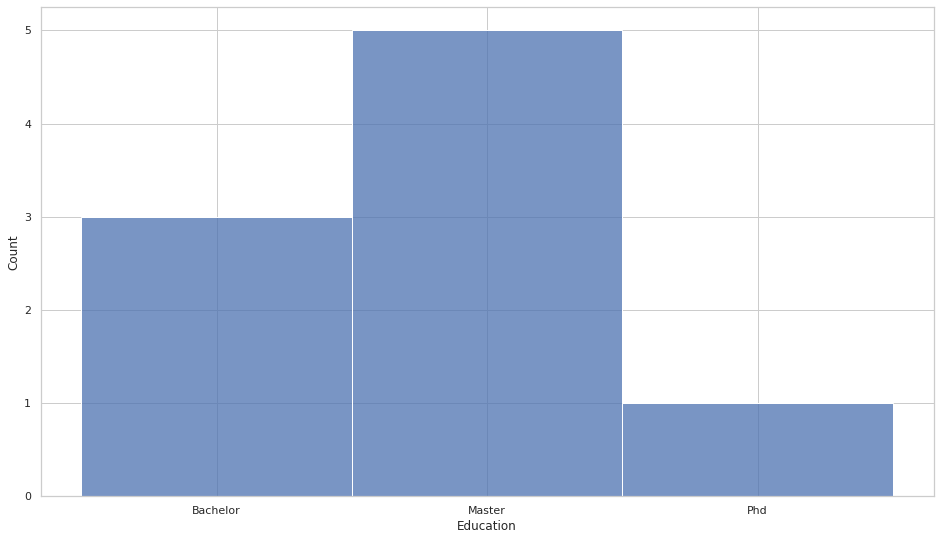

In [61]:
sns.histplot(x=employee['Education'], color='b');

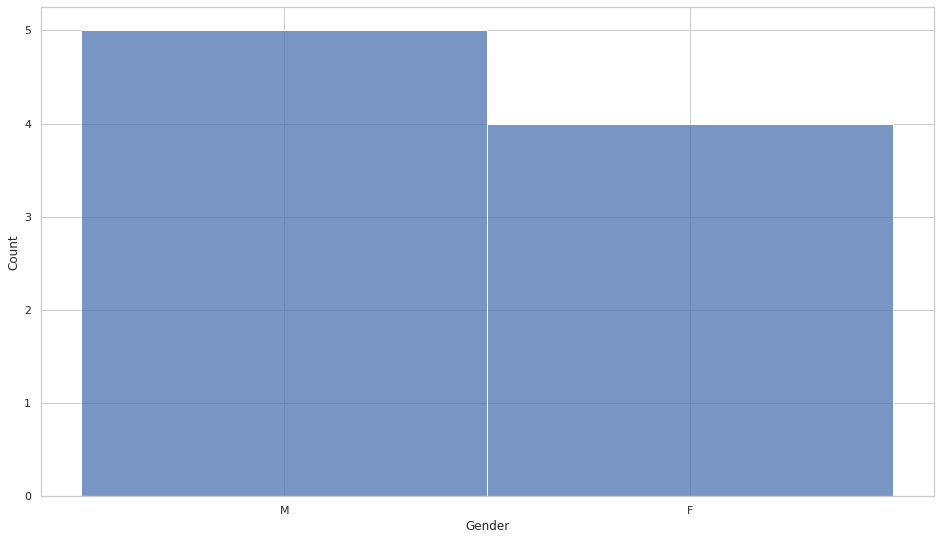

In [66]:
sns.histplot(x=employee['Gender'], color='b');

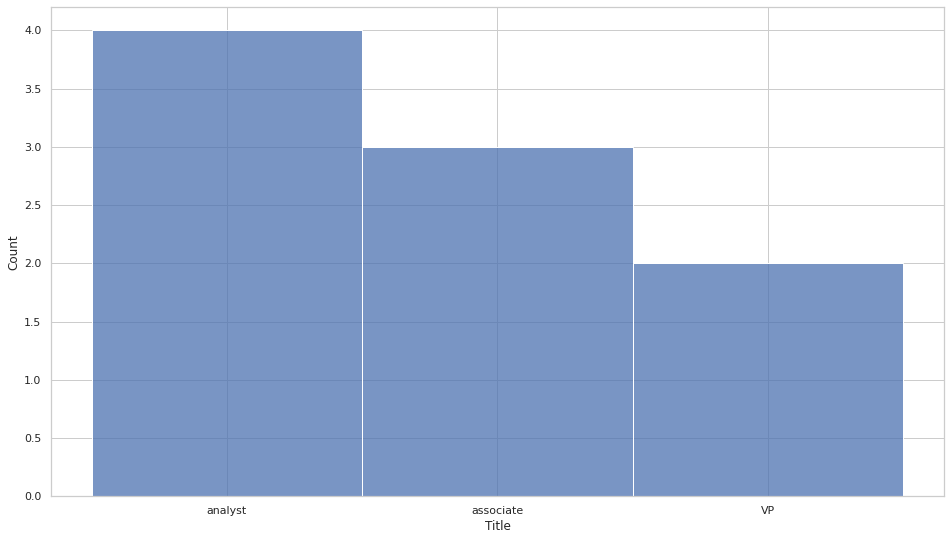

In [71]:
sns.histplot(x=employee['Title'], color='b');

From the histograms, we can see that (1) it's a small company, with less than 10 employees; (2) it's pretty specialised in its field, as all the employees have high qualifications; (3) the rate male:female is well paired; (4) and as the most extended profile is 'analyst', probably the company's field is related to the tech sector.

#### What's the average salary in this company?

In [72]:
employee['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [73]:
employee['Salary'].max()

70

#### What's the lowest salary?

In [74]:
employee['Salary'].min()

30

#### Who are the employees with the lowest salary?

In [77]:
employee.loc[employee['Salary'] == employee['Salary'].min()]

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [79]:
employee.loc[employee['Name'] == 'David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [80]:
a = employee.loc[employee['Name'] == 'David']
a['Salary']

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [81]:
employee.loc[employee['Title'] == 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [82]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [86]:
employee[0:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [87]:
employee.loc[(employee['Title'] == 'associate')&(employee['Salary']>55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [91]:
employee.groupby(['Salary']).mean()

,Years
Salary,
30,2.0
35,2.5
55,2.5
60,7.0
70,8.0


####  What is the average Salary per title?

In [94]:
employee.groupby(['Title']).mean()

,Years,Salary
Title,,
VP,8.00,70.000000
analyst,2.25,32.500000
associate,4.00,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

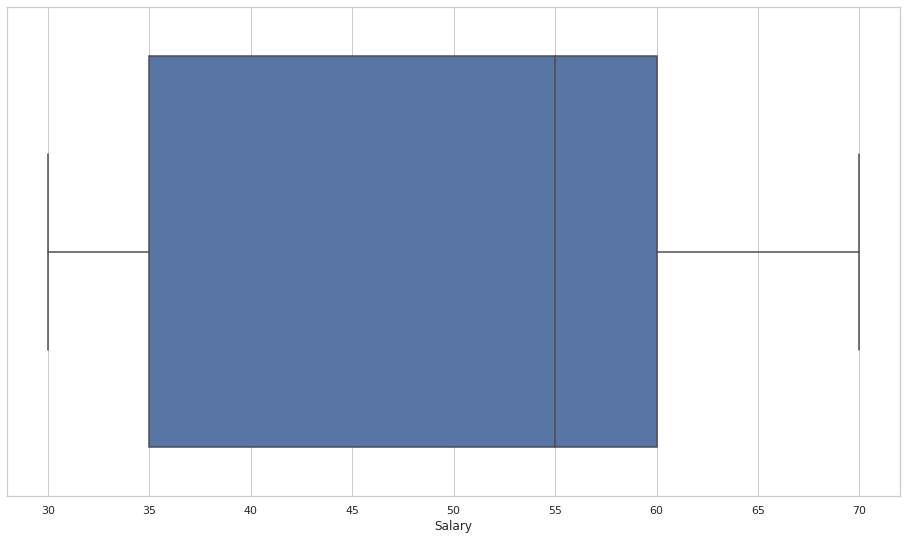

In [96]:
sns.boxplot(x="Salary", data=employee);

The boxplot is showing that (1) the minimum salary is 30; (2) the maximum salary is 70; (3) 75% of the employees earn over 35k while 25% do earn over 60; (4) the median is placed at 55k; (5) and that there are not outliers points.

In [99]:
employee.quantile(0.25)

Years      2.0
Salary    35.0
Name: 0.25, dtype: float64

In [100]:
employee.quantile(0.75)

Years      7.0
Salary    60.0
Name: 0.75, dtype: float64

#### Is the mean salary per gender different?

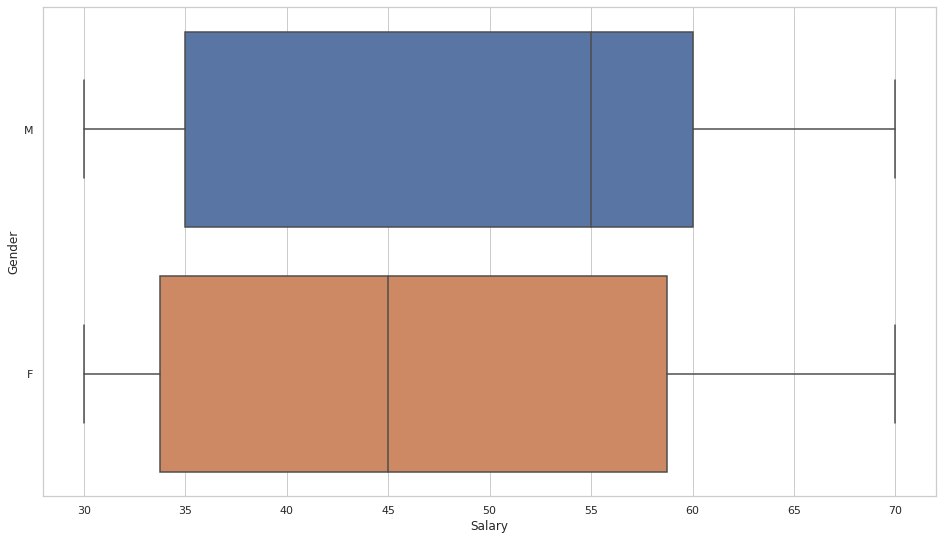

In [105]:
sns.boxplot(x="Salary",y='Gender', data=employee);

In [104]:
employee.groupby(['Gender']).mean()

,Years,Salary
Gender,,
F,4.0,47.5
M,4.2,50.0


In [106]:
employee.loc[employee['Years'] == 2.0]

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
5,Eva,Sales,Bachelor,F,associate,2,55


Yes, the salary it's a little lower on average for the women. However their average years in the company is also a bit lower, there are differences between the employees titles, and for example when checking the situation of Maria and David (above) it is clear that they both earn the same. It would be neccessary to check individually each case, considering the gender, the title, the number of years and the department. 

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [107]:
employee.groupby(['Department']).mean()

,Years,Salary
Department,,
HR,4.666667,45.00
IT,4.500000,48.75
Sales,2.500000,55.00


In [109]:
employee.groupby(['Department']).min()

,Name,Education,Gender,Title,Years,Salary
Department,,,,,,
HR,Ana,Bachelor,F,VP,2,30
IT,Carlos,Bachelor,F,VP,1,30
Sales,Eva,Bachelor,F,associate,2,55


In [108]:
employee.groupby(['Department']).max()

,Name,Education,Gender,Title,Years,Salary
Department,,,,,,
HR,Sonia,Master,M,analyst,8,70
IT,Pedro,Phd,M,associate,8,70
Sales,Samuel,Master,M,associate,3,55


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [32]:
for i in 

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [110]:
orders = pd.read_csv('Orders.csv')

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [111]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [117]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [119]:
orders.loc[0]

Unnamed: 0                                       0
InvoiceNo                                   536365
StockCode                                   85123A
year                                          2010
month                                           12
day                                              3
hour                                             8
Description     white hanging heart t-light holder
Quantity                                         6
InvoiceDate                    2010-12-01 08:26:00
UnitPrice                                     2.55
CustomerID                                   17850
Country                             United Kingdom
amount_spent                                  15.3
Name: 0, dtype: object

In [120]:
orders['UnitPrice'].mean()

3.116174480549152

#### What were the highest and lowest purchase prices? 

In [121]:
orders['UnitPrice'].max()

8142.75

In [124]:
orders['UnitPrice'].min()

0.0

#### Select all the customers we have in Spain

In [126]:
# The range is only for limit the shown results
orders.loc[orders['Country'] == 'Spain'][0:3]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [128]:
(orders.loc[orders['Country'] == 'Spain']).count()

Unnamed: 0      2485
InvoiceNo       2485
StockCode       2485
year            2485
month           2485
day             2485
hour            2485
Description     2485
Quantity        2485
InvoiceDate     2485
UnitPrice       2485
CustomerID      2485
Country         2485
amount_spent    2485
dtype: int64

#### Select all the customers who have bought more than 50 items ?

In [132]:
orders.loc[orders['Quantity'] > 50][0:3]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
46,46,536371,22086,2010,12,3,9,paper chain kit 50's christmas,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.0
83,83,536376,21733,2010,12,3,9,red hanging heart t-light holder,64,2010-12-01 09:32:00,2.55,15291,United Kingdom,163.2
96,96,536378,21212,2010,12,3,9,pack of 72 retrospot cake cases,120,2010-12-01 09:37:00,0.42,14688,United Kingdom,50.4


#### Select orders from Spain that are above 50 items

In [133]:
orders.loc[(orders['Country'] == 'Spain')&(orders['Quantity']>50)][0:3]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0


#### Select all free orders

In [136]:
orders.loc[orders['amount_spent'] == 0][0:3]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [155]:
S=orders['Description']
S[S.str.match(r'(lunch bag)')==True][0:3]

93         lunch bag red retrospot
172    lunch bag dolly girl design
354    lunch bag dolly girl design
Name: Description, dtype: object

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [156]:
S=orders['Description']
orders.loc[(orders['year'] == 2011)&(S.str.match(r'(lunch bag)')==True)][0:3]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.5
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.5
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.3


#### Show the frequency distribution of the amount spent in Spain.

In [ ]:
# your answer here

#### Select all orders made in the month of August

In [158]:
orders.loc[orders['month'] == 8][0:3]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [169]:
(orders.loc[orders['month'] == 8]).count()[0:3]

Unnamed: 0    27013
InvoiceNo     27013
StockCode     27013
dtype: int64

#### What's the  average amount of money spent by country

In [180]:
a=orders.groupby(['Country']).mean()
a['amount_spent'][0:3]

Country
Australia    116.895620
Austria       25.624824
Bahrain       32.258824
Name: amount_spent, dtype: float64

#### What's the most expensive item?

In [191]:
orders.groupby(['Description']).max().sort_values(by=['UnitPrice'],ascending=False)[0:5]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
Description,,,,,,,,,,,,,
postage,541768,581578,POST,2011,12,7,19,21,2011-12-09 12:16:00,8142.75,17935,United Kingdom,8142.75
manual,538321,581405,M,2011,12,7,20,1600,2011-12-08 13:50:00,4161.06,18283,United Kingdom,4161.06
dotcom postage,528082,580727,DOT,2011,12,5,17,1,2011-12-05 17:17:00,1599.26,14096,United Kingdom,1599.26
picnic basket wicker 60 pieces,222682,556446,22502,2011,6,5,15,60,2011-06-10 15:33:00,649.50,15098,United Kingdom,38970.00
vintage blue kitchen cabinet,393465,570827,22656,2011,12,7,17,2,2011-10-12 13:14:00,295.00,17690,United Kingdom,295.00


#### What was the average amount spent per year ?

In [194]:
orders.groupby(['year']).mean().sort_values(by=['amount_spent'],ascending=False)

,Unnamed: 0,InvoiceNo,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
year,,,,,,,,,
2011,296660.861310,562207.976246,7.303803,3.605338,12.716328,13.098138,3.115054,15277.794830,22.430074
2010,19884.040482,538009.305122,12.000000,3.745528,12.897630,11.937309,3.132095,15529.088417,21.892733
